<a href="https://colab.research.google.com/github/qhung23125005/AIO/blob/main/AIO24/Module3/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

A **Decision Tree** is a **supervised learning algorithm** used for both **classification and regression** tasks. It is a tree-like model that splits data into different branches based on conditions.

- **Root Node**: The first node, representing the entire dataset.
- **Internal Nodes**: Decision points based on feature values.
- **Leaf Nodes**: Final predictions or class labels.


## How Does a Decision Tree Work?
1. Select the **best feature** to split the dataset.
2. Split the dataset into smaller subsets.
3. Repeat the process recursively until stopping criteria are met (e.g., max depth reached).
4. The final tree is used for making predictions.

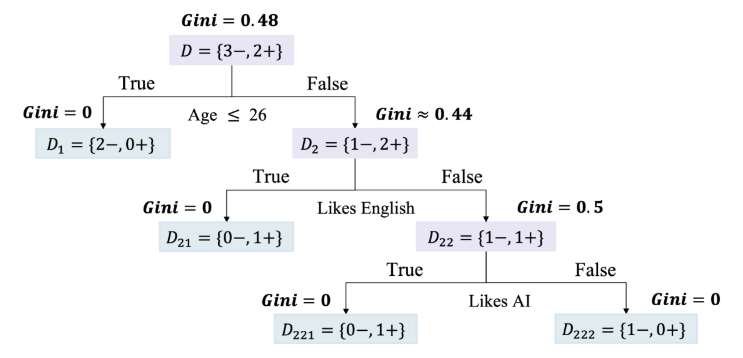


#Decision Tree for Classification

In **classification problems**, decision trees use **Gini Impurity** or **Entropy** to measure the **impurity (uncertainty)** of a dataset and decide the best feature to split the data.

Both metrics help determine how mixed the classes are at a given node, with **lower values indicating purer nodes**.

---

##**Gini Impurity**
**Gini Impurity** measures the probability that a randomly chosen element **is incorrectly classified** if labeled randomly according to the class distribution.

### **Formula for Gini Impurity:**
$$
Gini(D_i) = 1 - \sum_{j=1}^{c} p_j^2
$$
where:
- $c$ is the number of classes,
- $p_j$ is the proportion of class \( j \) in the dataset \( D_i \).

### **Weighted Gini After Splitting:**
If we split a dataset into two subsets $D_1$ and $D_2$, the **weighted Gini impurity** is:

$$
Gini(D) = \frac{n_1}{n} Gini(D_1) + \frac{n_2}{n} Gini(D_2)
$$

where:
- $n_1$ and $n_2$ are the number of samples in $D_1$ and $D_2$,
- $n$ is the total number of samples.

**Lower Gini = Better purity.**  

---

## **Entropy in Classification**
**Entropy** is another metric that quantifies the uncertainty (randomness) in a dataset.

### **Formula for Entropy:**
$$
Entropy(D_i) = - \sum_{j=1}^{c} p_j \log_2 p_j
$$

where:
- $c$ is the number of classes,
- $p_j$ is the proportion of class $j$ in dataset $D_i$.

### **Weighted Entropy After Splitting:**
$$
Entropy(D) = \frac{n_1}{n} Entropy(D_1) + \frac{n_2}{n} Entropy(D_2)
$$

**Lower Entropy = Less randomness = Better purity.**

##Example:

 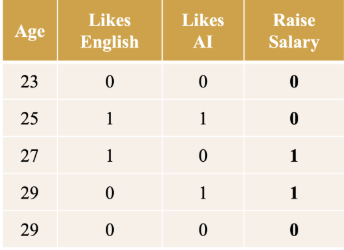

- Gini(D = Raise Salary) = 0.48
- If "Like English" is a root node, Gini(Like English) = 0.47
- If "Age" is a root node and the condition is "Age <= 26", Gini(Age < 26) = 0.27
- Entropy(Raise Salary) = 0.97
- If "Like English" is a root node, Gain(Like English) = 0.048

##Code

In [6]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [7]:
#Load the data
iris_X, iris_y = datasets.load_iris(return_X_y=True)

#Split the data
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y,
                                                    test_size=0.2,
                                                    random_state = 42)

#Define the model
dt_classifier = DecisionTreeClassifier()

#Train the model
dt_classifier.fit(X_train, y_train)

#Predict and evaluate
y_pred = dt_classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Decision Tree for Regression

For **Regression problems**, to select the best feature for splitting the dataset and building the decision tree, we use the **Sum of Squared Error (SSE)** metric.

### **SSE Formula**
The **SSE** is calculated as:

$$
SSE(D) = SSE(D_1) + SSE(D_2)
$$

For each subset \( D_i \), the SSE is:

$$
SSE(D_i) = \frac{1}{n_i} \sum_{j=1}^{n_i} (x_j - \bar{x_i})^2
$$

where:
-  $D$ is the original dataset with $n$ samples.
- $D_1$ and $D_2$ are two subsets with $n_1$ and $n_2$ samples, respectively.
- $\bar{x_i}$ is the **mean value** of the samples in subset $D_i$.

To determine the **best feature for splitting**, we choose the split that **minimizes SSE**, ensuring the most accurate regression decision tree.

##Example:

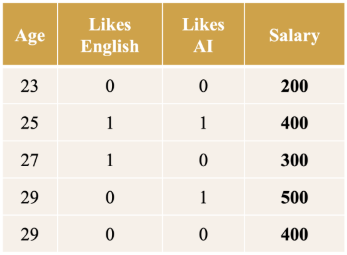

- If Likes AI is a root node, SSE(Like English) = 9167
- If Age is a root node and the condition is "Age <= 24", SSE(Age <= 24) = 2500


##Code

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [10]:
# Load dataset
machine_cpu = fetch_openml (name ='machine_cpu')
machine_data = machine_cpu.data
machine_labels = machine_cpu.target
# Split train : test = 8:2
X_train , X_test , y_train , y_test = train_test_split (machine_data,
                                                        machine_labels,
                                                        test_size =0.2,
                                                        random_state =42)
# Define model
tree_reg = DecisionTreeRegressor()

# Train
tree_reg.fit(X_train, y_train)

# Preidct and evaluate
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=230
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=733

  warn(warning_msg)


9104.166666666666